In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

s = pd.read_csv("salary.csv")
print(s.columns)
s


Index(['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python',
       'c++', 'golang', 'angular', 'level', 'salary'],
      dtype='object')


,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,000 USD"
1,1,0,1,0,0,0,0,0,0,0,0,fresher,You'll love it
2,1,0,0,0,0,0,0,1,0,0,0,fresher,You'll love it
3,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,500 USD"
4,1,0,0,0,1,0,0,0,0,0,0,fresher,Up to 2.000 $
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,1,senior,"1,000 - 2,500 USD"
1196,0,0,0,0,0,0,0,0,0,0,1,senior,You'll love it
1197,0,0,0,0,0,0,0,0,0,0,1,senior,You'll love it
1198,0,0,0,0,0,0,0,0,0,0,1,senior,"2,000 - 2,900 USD"


In [2]:
#question 2: Top 5 programming languages ​​with the most recruitment demand
recruit = s.sum(axis=0)
#recruit.sort_values(ascending=True,na_position='last')
recruit.drop(labels=['level','salary']).sort_values(ascending=False)[:5]



java       416
reactjs    245
python     220
nodejs     210
php        193
dtype: object

<AxesSubplot:>

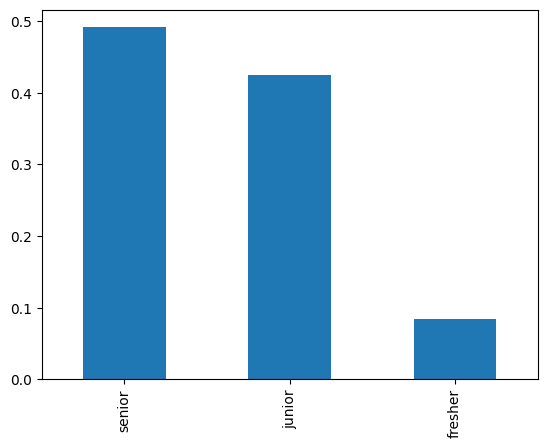

In [3]:
#question 1: Compare the ratio of the employer's experience requirement
s.level.value_counts(normalize=True).plot(kind='bar')

In [4]:
#salary - copy from data_explore.ipynb
import re

def proccessing(jds):
    result = []
    for i in range(len(jds)):        
        job_description = jds[i][12]
        
        # lower case and delted all trailing whitespace 
    
        job_description = "".join(job_description.split()).lower()
        
        if job_description.find("upto") == 0:
            upto_salry = calculate_unit_salary(job_description.split("upto")[1])
            average = float(upto_salry) / 2
            jds[i][12] = average
            
            result.append(jds[i])
        else:
            range_salary = job_description.split("-")
            
            if len(range_salary) == 2:
                min_salary = calculate_unit_salary(range_salary[0])
                max_salary = calculate_unit_salary(range_salary[1])
                average = (float(min_salary) + float(max_salary)) / 2
                          
                jds[i][12] = average   
                result.append(jds[i])  
    return result


  

In [5]:
def calculate_unit_salary(salary):    
    salary_without_unit = salary.replace("usd", "").replace("$", "").replace(",", "").replace(".", "")
        
    # for in case salary dont pay with USD 
    
    salary_only_number = re.findall('[0-9]+', salary_without_unit)[0]
    if len(salary_only_number) != len(salary_without_unit) and len(salary_only_number) == 2:
        salary_without_unit = int(salary_only_number + "000000") * 0.000042
        return salary_without_unit
    else:
        return salary_only_number

In [6]:
range_salary = proccessing(s.values)

In [7]:
range_salary = np.asarray(range_salary)

In [8]:
df = pd.DataFrame(range_salary, columns = ['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular', 'level', 'average_salary'])
  
df

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,average_salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,1500.0
1,1,0,0,0,0,0,0,0,0,0,0,fresher,1750.0
2,1,0,0,0,1,0,0,0,0,0,0,fresher,1000.0
3,1,0,0,0,0,0,0,0,0,0,0,fresher,1500.0
4,1,0,0,0,0,0,0,0,0,0,1,fresher,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0,1,0,0,0,0,0,0,0,0,1,senior,2000.0
500,0,0,0,0,0,0,0,0,0,0,1,senior,1680.0
501,0,0,0,0,0,0,0,0,0,0,1,senior,3000.0
502,0,0,0,0,0,0,0,0,0,0,1,senior,1750.0


In [9]:
#question 4: Top 5 skills with the highest average salary 
lst =[]
for i in range(len(df.columns)-2):
    agg = df.groupby(df.columns[i])['average_salary'].agg(['mean']).reset_index()
    lst.append(agg['mean'][1])
type(lst)

data=pd.Series(lst,index =['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular'])
data.sort_values(ascending=False)[:5]



c++       2.038673e+06
nodejs    1.943976e+03
ruby      1.867857e+03
python    1.840174e+03
java      1.789744e+03
dtype: float64

In [10]:
#question 5: Average salary of each level ? 
average_level = df.groupby('level')['average_salary'].agg('mean').reset_index()
average_level

,level,average_salary
0,fresher,1283.155556
1,junior,276546.397500
2,senior,214198.021236
